<a href="https://colab.research.google.com/github/SolisProcopioUriel/SimulacionII/blob/main/Ejercicio_16_Problema_del_encuentro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Nombre: Solis Procopio Uriel**

**Problema 16:** Dos personas han quedado citadas en un determinado lugar. Ambos tienen la misma probabilidad de llegar al lugar de la cita en el intevalo de tiempo $[0,30]$.

Determínese la probabilidad de que el tiempo que una persona espere a la otra sea como másximo 10.

Resolver:

a) Por simulación

b) Analíticamente


#**Analíticamente**


Consideremos a $X$ como la variable aleatoria la cual representa el tiempo que tarda una persona en llegar al lugar de la cita.

Consideremos a $Y$ como la variable aleatoria que representa el tiempo que tarda la otra persona en llegar al lugar de la cita.

Como las dos personas tienen la misma probabilidad de llegar en cualquier momento de nuestro intervalo $[0,30]$ podemos intuir que $X$ e $Y$ son variables aleatorias uniformes en $[0,30]$

Ahora el problema que se nos presenta tiene que tener una condición y que al momento de que la primera persona llega tiene que esperar a lo más 10 minutos a que llegue la segunda persona al lugar de la cita, entonces si consideramos un caso particular donde la persona llega supongamos al minuto 5, entonces la segunda persona no puede llegar antes de los 5 minutos y no puede pasar del minuto 15 para llegar.

Entonces queremos calcular la probabilidad de que la primera persona( denotada por $X$), espere a la segunda persona(denotada por $Y$), entonces eso podemos verlo como

  \begin{equation}
    X < Y
  \end{equation}

Pero también queremos que el tiempo de espera sea como máximo 10 minutos, entoces podemos verlo como

  



Consideremos a $X$ como la variable aleatoria la cual representa el tiempo que tarda una persona en llegar al lugar de la cita.

Consideremos a $Y$ como la variable aleatoria que representa el tiempo que tarda la otra persona en llegar al lugar de la cita.

Como las dos personas tienen la misma probabilidad de llegar en cualquier momento de nuestro intervalo $[0,30]$ podemos intuir que $X$ e $Y$ son variables aleatorias uniformes en $[0,30]$

Ahora el problema que se nos presenta tiene que tener una condición y que al momento de que la primera persona llega tiene que esperar a lo más 10 minutos a que llegue la segunda persona al lugar de la cita, entonces si consideramos un caso particular donde la persona llega supongamos al minuto 5, entonces la segunda persona no puede llegar antes de los 5 minutos y no puede pasar del minuto 15 para llegar.

Entonces queremos calcular la probabilidad de que la primera persona( denotada por $X$), espere a la segunda persona(denotada por $Y$), entonces eso podemos verlo como

  \begin{equation}
    X < Y
  \end{equation}
  
Pero también queremos que el tiempo de espera sea como máximo 10 minutos, entoces podemos verlo como

  \begin{equation}
    Y-X \leq 10
  \end{equation}

Entonces esto sería una probabilidad condicional, la cual podemos verla como

  \begin{equation}
    P(X-Y\leq 10 | X<Y) = \frac{P(X-Y\leq 10, X<Y)}{P(X<Y)}
  \end{equation}

Por un lado podemos calcular al númerador como

  \begin{equation}
    P\left(Y-X\leq 10, X<Y\right )=\frac{\frac{1}{2}⋅ 10 ⋅20}{30⋅ 30}= \frac{1}{9}
  \end{equation}

Mientras que por otro lado tendremos que

  \begin{equation}
    P(X<Y) = \frac{\frac{1}{2}⋅30⋅30}{30⋅30} = \frac{1}{2}
  \end{equation}

Finalmente la probabilidad condicional quedaría de la siguiente manera

  \begin{equation}
    P(X-Y\leq 10 | X<Y) = \frac{P(X-Y\leq 10, X<Y)}{P(X<Y)}= \frac{\frac{1}{9}}{\frac{1}{2}} = \frac{2}{9}
  \end{equation}

Entonces la probabilidad de que la primera persona espere a la segunda persona en un tiempo como máximo de 10 minutos de 0.2222 o lo que equivale a 22.22\%


#**Simulación**

In [27]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [28]:
def prob_esp(n):

  prob = [] # Creamos una lista vacía para almacenar las probabilidades estimadas
  count = 0  # contador de eventos favorables

  # Generamos dos tiempos aleatorios de llegada uniformemente distribuidos entre 0 y 30 minutos
  for i in range(n):
    x = random.uniform(0, 30)  # tiempo que tarda la persona 1
    y = random.uniform(0, 30)  # tiempo que tarda la persona 2
    if x < y and y - x <= 10:  # Comprobamos si la persona 1 llega antes que la persona 2 y si la diferencia entre los tiempos es menor o igual a 10 minutos
        count += 1             # Si se cumple la condición, aumentamos el contador de eventos favorables
        prob.append(count/(i+1)) # Calculamos la probabilidad estimada en cada iteración y la agregamos a la lista prob
  return prob  # Devolvemos la lista de probabilidades estimadas

In [35]:
p = prob_esp(10000) # Asignamos valores a n y realizamos el experimento

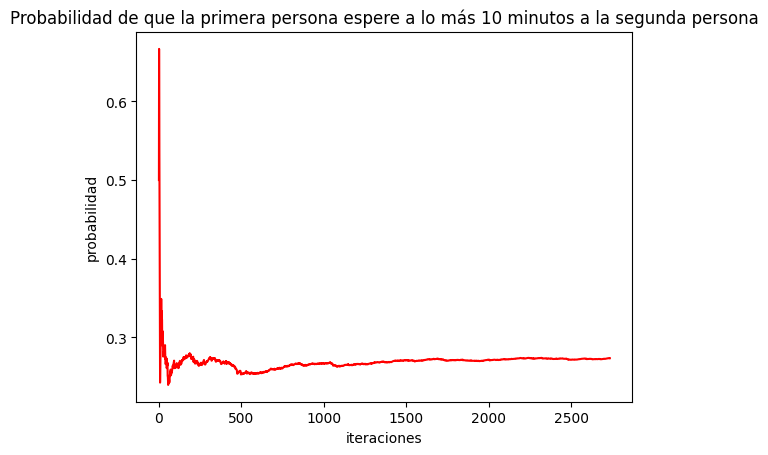

In [36]:
plt.plot(p,color="red") #Graficar
plt.xlabel('iteraciones') #Etiqueta del eje de las x
plt.ylabel('probabilidad') #Etiqueta del eje de las y
plt.title('Probabilidad de que la primera persona espere a lo más 10 minutos a la segunda persona') #Titulo de la grafica
plt.show() #Mostrar la gráfica

In [37]:
print(np.mean(p), np.std(p)) # Imprimimos la media y la desviación estándar de las probabilidades obtenidas

0.26903937077480866 0.014758759512043444


In [39]:
#Repetimos el experimento n veces
def modelo(n):
    lista = []
    for i in range(n):
      s = prob_esp(10000) # Repetimos el experimento 10000 veces y guardamos las probabilidades en la lista 
      lista.append(np.mean(s)) # Calculamos la media de las probabilidades de la lista s y la añadimos a la lista lista
    return lista

In [40]:
Y=modelo(200) # Generamos 200 simulaciones del experimento con la función modelo(n)

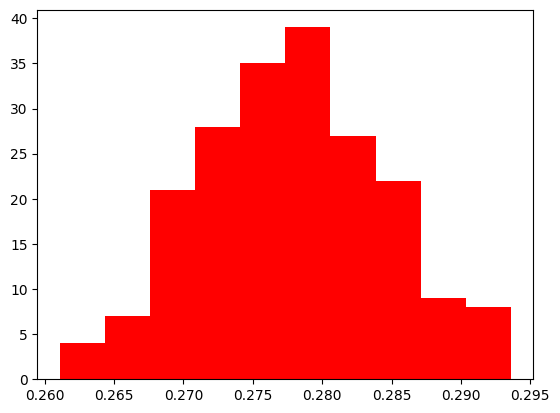

In [41]:
plt.hist(Y, color="red")#Graficar
plt.show()#Mostrar la gráfica

In [42]:
np.mean(Y) #Calculamos e imprimimos la media

0.27782687874235895

In [43]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50) #Calculamos el intervalo de confianza

(0.2759763879274793, 0.2796773695572386)